<a href="https://colab.research.google.com/github/A-Akhlaghi246/PYTHON/blob/main/picture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

In [32]:
def showImage(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

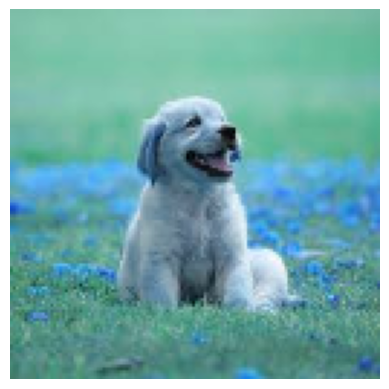

In [33]:
train_dog_folder = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/dogs'
train_cat_folder = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set/cats'

test_dog_folder = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set/dogs'
test_cat_folder = '/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set/cats'

# Verify if the image file exists
image_path = '/download.jpg'
if os.path.exists(image_path):
    data = cv2.imread(image_path)
    # Check if the image was loaded successfully
    if data is not None:
        #data.shape
        #showImage(data)
        data1 = cv2.resize(data, (128, 128), interpolation=cv2.INTER_CUBIC)  # Resize the loaded image
        #data1.shape
        showImage(data1)
    else:
        print(f"Error: Could not load image from {image_path}. Check if the file exists and is not corrupted.")
else:
    print(f"Error: Image file not found at {image_path}")
#data1

In [34]:
def read_data_from_folder(folder,):
   x = []
   y = []

   for path, subdirs, files in os.walk(folder):
       for name in files:
           if(name.find('.jpg')>0):
               #print(os.path.join(path, name))
               x.append(cv2.resize(cv2.imread(os.path.join(path, name)), (128,128), interpolation=cv2.COLOR_BGR2GRAY))

               if(name.find('cat')!=-1):
                   y.append(1)
               else:
                   y.append(0)

   return np.array(x), np.array(y)

In [35]:
x_train, y_train  = read_data_from_folder('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set')
x_test, y_test = read_data_from_folder('/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set')

In [36]:
import keras
from keras import layers

In [37]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

x_train = x_train/255
x_test = x_test/255

y_train =  keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

(8005, 128, 128, 3)
(8005,)
(2023, 128, 128, 3)
(2023,)


In [38]:
model = keras.Sequential([
       keras.Input(shape=(128,128,3)),
       layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
       layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Flatten(),
       layers.Dropout(0.5),
       layers.Dense(2, activation="softmax"),
])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        12,546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,050 (164.26 KB)

 Trainable params: 42,050 (164.26 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
batch_size = 20
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 269s 741ms/step - accuracy: 0.5793 - loss: 0.6738 - val_accuracy: 0.3421 - val_loss: 0.8296
Epoch 2/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 310s 708ms/step - accuracy: 0.6870 - loss: 0.5956 - val_accuracy: 0.5044 - val_loss: 0.8344
Epoch 3/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 262s 726ms/step - accuracy: 0.7190 - loss: 0.5535 - val_accuracy: 0.7079 - val_loss: 0.6144
Epoch 4/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 313s 702ms/step - accuracy: 0.7624 - loss: 0.4897 - val_accuracy: 0.7803 - val_loss: 0.5082
Epoch 5/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 267s 716ms/step - accuracy: 0.7745 - loss: 0.4792 - val_accuracy: 0.8889 - val_loss: 0.3172
Epoch 6/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 254s 696ms/step - accuracy: 0.7941 - loss: 0.4387 - val_accuracy: 0.7865 - val_loss: 0.4835
Epoch 7/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 263s 699ms/step - accuracy: 0.8109 - loss: 0.4207 - val_accuracy: 0.7316 - val_loss: 0.5888
Epoch 8/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 262s 698ms/step - accuracy: 0.8306 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
[[1. 0.]]
This image is 26.89% cat and 73.11% dog.


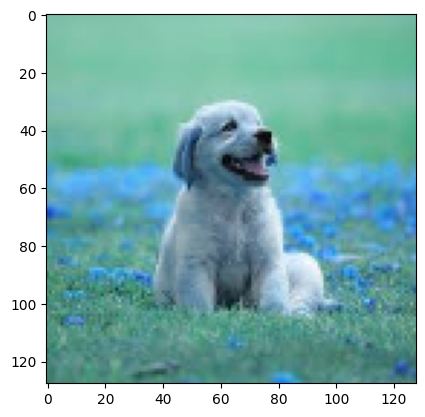

In [43]:
img = cv2.resize(cv2.imread('/download.jpg'), (128,128), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")